DA Mini Project
* 주제 : 온라인 학습 플랫폼 사용자 행동 패턴 분석
* 개요 :
```
이번 프로젝트는 학습 서비스를 이용하는 독자들 중 누가 서비스 구독을 연장할지 예측하기 위한 사전 파악에 초점을 맞추고 있습니다. 우리의 목표는 유저들의 학습 습관, 선호도, 이용 행태 등 다양한 측면을 면밀히 분석하는 것입니다.


이를 위해, 우리는 유저들의 학습 패턴, 서비스 이용 시간, 콘텐츠에 대한 반응, 그리고 이들이 얼마나 자주 서비스를 이용하는지 등 다양한 데이터를 수집하고 분석할 계획입니다. 이 데이터는 유저들이 서비스에 얼마나 만족하고 있는지, 어떤 요소들이 그들의 구독 결정에 영향을 미치는지 이해하는 데 중요한 역할을 할 것입니다.
```
* 데이터셋 : mini.csv
    * 메타데이터
        * user_id: 사용자의 고유 식별자
        * subscription_duration: 사용자가 서비스에 가입한 기간 (월)
        * recent_login_time: 사용자가 마지막으로 로그인한 시간 (일)
        * average_login_time:  사용자의 일반적인 로그인 시간
        * average_time_per_learning_session: 각 학습 세션에 소요된 평균 시간 (분)
        * monthly_active_learning_days: 월간 활동적인 학습 일수
        * total_completed_courses: 완료한 총 코스 수
        * recent_learning_achievement: 최근 학습 성취도
        * abandoned_learning_sessions: 중단된 학습 세션 수
        * community_engagement_level: 커뮤니티 참여도
        * preferred_difficulty_level: 선호하는 난이도
        * subscription_type: 구독 유형
        * customer_inquiry_history: 고객 문의 이력
        * payment_pattern : 사용자의 지난 3개월 간의 결제 패턴을 10진수로 표현한 값.
          - 7: 3개월 모두 결제함
          - 6: 첫 2개월은 결제했으나 마지막 달에는 결제하지 않음
          - 5: 첫 달과 마지막 달에 결제함
          - 4: 첫 달에만 결제함
          - 3: 마지막 2개월에 결제함
          - 2: 가운데 달에만 결제함
          - 1: 마지막 달에만 결제함
          - 0: 3개월 동안 결제하지 않음
         * target : 구독 연장 여부
             - 0 : 비연장
             - 1 : 연장
            

# 문제정의 : 서비스 이용자의 학습 행동이 구독 연장에 영향을 미치는 요소 파악

In [1]:
#데이터 불러오기 및 설정
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

df = pd.read_csv('C:\workspace\python\YONGYONG\데이터분석\data\mini.csv')
df

,user_id,subscription_duration,recent_login_time,average_login_time,average_time_per_learning_session,monthly_active_learning_days,total_completed_courses,recent_learning_achievement,abandoned_learning_sessions,community_engagement_level,preferred_difficulty_level,subscription_type,customer_inquiry_history,payment_pattern,target
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [2]:
#칼럼명 한글로 변경
columns = [
    '유저 아이디',
    '구독 기간(월)',
    '최근 로그인 (일)',
    '평균 로그인 시간',
    '학습 평균 시간(분)',
    '월간 학습 일수',
    '수료한 코스',
    '최근 학습 성취도',
    '중단된 학습',
    '커뮤니티 참여도',
    '선호하는 난이도',
    '구독 유형',
    '고객 문의 이력',
    '지난 3개월 결제 패턴',
    '구독 연장 여부'
]

# 칼럼명 변경
df.columns = columns

# 변경된 칼럼명 확인
df

,유저 아이디,구독 기간(월),최근 로그인 (일),평균 로그인 시간,학습 평균 시간(분),월간 학습 일수,수료한 코스,최근 학습 성취도,중단된 학습,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,지난 3개월 결제 패턴,구독 연장 여부
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,Low,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,Medium,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,Medium,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,Low,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,Medium,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,Low,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,Medium,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,High,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,Low,Basic,2,0,1


In [3]:
df['선호하는 난이도'] = df['선호하는 난이도'].map({'Low':0, 'Medium':1,'High':2})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   유저 아이디        10000 non-null  object 
 1   구독 기간(월)      10000 non-null  int64  
 2   최근 로그인 (일)    10000 non-null  int64  
 3   평균 로그인 시간     10000 non-null  float64
 4   학습 평균 시간(분)   10000 non-null  float64
 5   월간 학습 일수      10000 non-null  int64  
 6   수료한 코스        10000 non-null  int64  
 7   최근 학습 성취도     10000 non-null  float64
 8   중단된 학습        10000 non-null  int64  
 9   커뮤니티 참여도      10000 non-null  int64  
 10  선호하는 난이도      10000 non-null  int64  
 11  구독 유형         10000 non-null  object 
 12  고객 문의 이력      10000 non-null  int64  
 13  지난 3개월 결제 패턴  10000 non-null  int64  
 14  구독 연장 여부      10000 non-null  int64  
dtypes: float64(3), int64(10), object(2)
memory usage: 1.1+ MB


In [5]:
df.describe()

,구독 기간(월),최근 로그인 (일),평균 로그인 시간,학습 평균 시간(분),월간 학습 일수,수료한 코스,최근 학습 성취도,중단된 학습,커뮤니티 참여도,선호하는 난이도,고객 문의 이력,지난 3개월 결제 패턴,구독 연장 여부
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.897400,15.013200,14.994076,54.917720,12.545400,12.227500,75.029513,3.043600,3.886100,0.700800,2.010500,3.502900,0.619900
std,6.600896,8.362573,3.001869,56.024310,6.932239,3.634125,9.968529,1.755052,1.262175,0.780859,1.420983,2.311261,0.485435
min,1.000000,1.000000,2.366189,0.011515,1.000000,1.000000,35.941755,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,8.000000,13.025597,15.276611,7.000000,10.000000,68.278054,2.000000,3.000000,0.000000,1.000000,1.000000,0.000000
50%,12.000000,15.000000,14.979228,37.578818,13.000000,12.000000,75.126061,3.000000,4.000000,1.000000,2.000000,4.000000,1.000000
75%,18.000000,22.000000,16.995340,75.584200,19.000000,15.000000,81.718976,4.000000,5.000000,1.000000,3.000000,6.000000,1.000000
max,23.000000,29.000000,26.998490,503.372616,24.000000,27.000000,112.643828,12.000000,5.000000,2.000000,10.000000,7.000000,1.000000


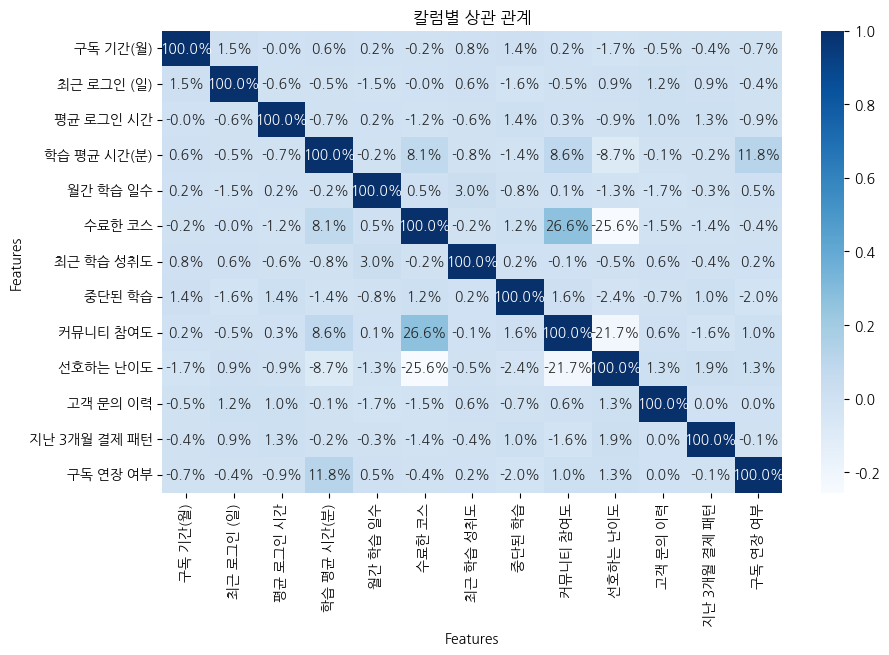

In [6]:
# 각 칼럼별 상관 관계 파악 / 유저 아이디는 제외
del_columns = ['유저 아이디']
corr_data = df.drop(del_columns, axis=1).select_dtypes(include=['int64', 'float64'])
corr = corr_data.corr()

plt.figure(figsize=(10, 6))

sns.heatmap(corr, annot=True, fmt=".1%", cmap='Blues')

plt.title('칼럼별 상관 관계')

plt.xlabel('Features')
plt.ylabel('Features')

plt.show()

학습 평균 시간(분)이 구독 연장 여부와 '상대적'으로 강한 관계를 보여주고 있다.

하지만 관계 계수로 따졌을때는 잘 모르겠다.

## 학습 평균 시간(분)과 구독 연장 여부의 상관 관계 파악하기

In [7]:
df_selected = df[['학습 평균 시간(분)', '구독 연장 여부']]
df_selected.head()

,학습 평균 시간(분),구독 연장 여부
0,8.427187,0
1,72.646087,1
2,21.774492,1
3,42.659066,1
4,30.744287,1


In [8]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   학습 평균 시간(분)  10000 non-null  float64
 1   구독 연장 여부     10000 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 156.4 KB


In [9]:
df_selected.describe()

,학습 평균 시간(분),구독 연장 여부
count,10000.000000,10000.000000
mean,54.917720,0.619900
std,56.024310,0.485435
min,0.011515,0.000000
25%,15.276611,0.000000
50%,37.578818,1.000000
75%,75.584200,1.000000
max,503.372616,1.000000


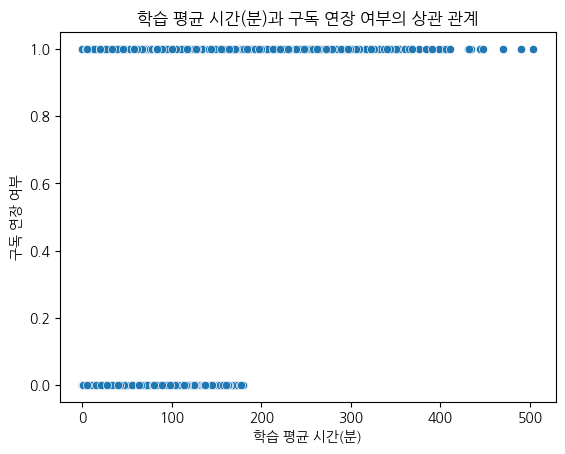

In [10]:
#학습평균시간과 구독연장여부
sns.scatterplot(x='학습 평균 시간(분)', y='구독 연장 여부', data=df_selected)
plt.title('학습 평균 시간(분)과 구독 연장 여부의 상관 관계')
plt.xlabel('학습 평균 시간(분)')
plt.ylabel('구독 연장 여부')
plt.show()

일정 시간 이상 공부한 학생들은 구독 연장 확률이 100% 이다.

그럼 일정 시간 이하로 공부한 학생들 중, 구독을 연장한 학생들은 누구일까?
1. 평균 학습 시간이 180분 이하인 학생들의 데이터를 추출
2. 추출한 데이터를 통해 각 요소별 상관 관계를 확인해보자

In [11]:
under_180 = df[df['학습 평균 시간(분)'] <= 180]
under_180

,유저 아이디,구독 기간(월),최근 로그인 (일),평균 로그인 시간,학습 평균 시간(분),월간 학습 일수,수료한 코스,최근 학습 성취도,중단된 학습,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,지난 3개월 결제 패턴,구독 연장 여부
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,Basic,1,6,1
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,Premium,0,7,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,Basic,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,Premium,1,1,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,Basic,1,6,1
9998,e07fbad9,11,7,18.783800,5.297234,10,10,89.885656,4,5,0,Basic,2,0,1


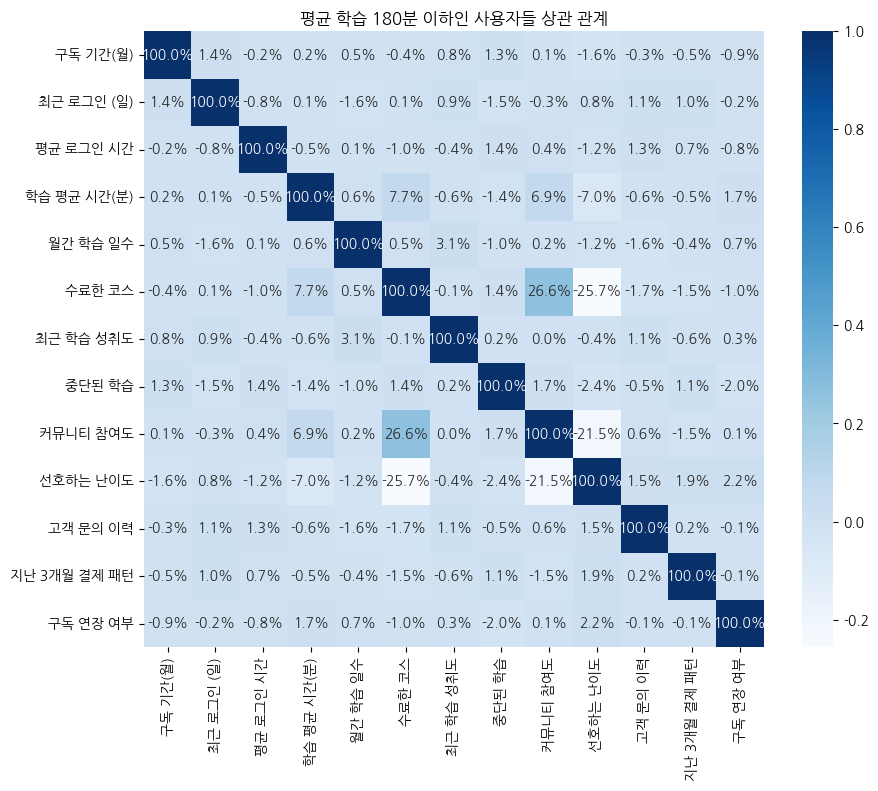

In [15]:
numerical_columns = under_180.select_dtypes(include=['float64', 'int64'])
correlation = numerical_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.1%')
plt.title('평균 학습 180분 이하인 사용자들 상관 관계')
plt.show()

평균 학습 시간이 180분 이하인 학생들을 그룹핑하여 각 요소별 상관 관계를 확인 했지만, 
커뮤니티 참여도와 수료한 코스간의 깊은 관계를 제외하고 구독 연장과 다른 요소간의 관계는 찾기 힘들어 보인다.

구독 연장과의 관계를 파악하지 않은 다른 열 분석 해보자

## 구독 유형에 따른 구독 연장 관계 분석

In [16]:
#데이터 추출
basic_subscription = df[df['구독 유형'] == 'Basic']
premium_subscription = df[df['구독 유형'] == 'Premium']

In [17]:
basic_renewed = basic_subscription['구독 연장 여부'].value_counts(normalize=True) * 100
premium_renewed = premium_subscription['구독 연장 여부'].value_counts(normalize=True) * 100

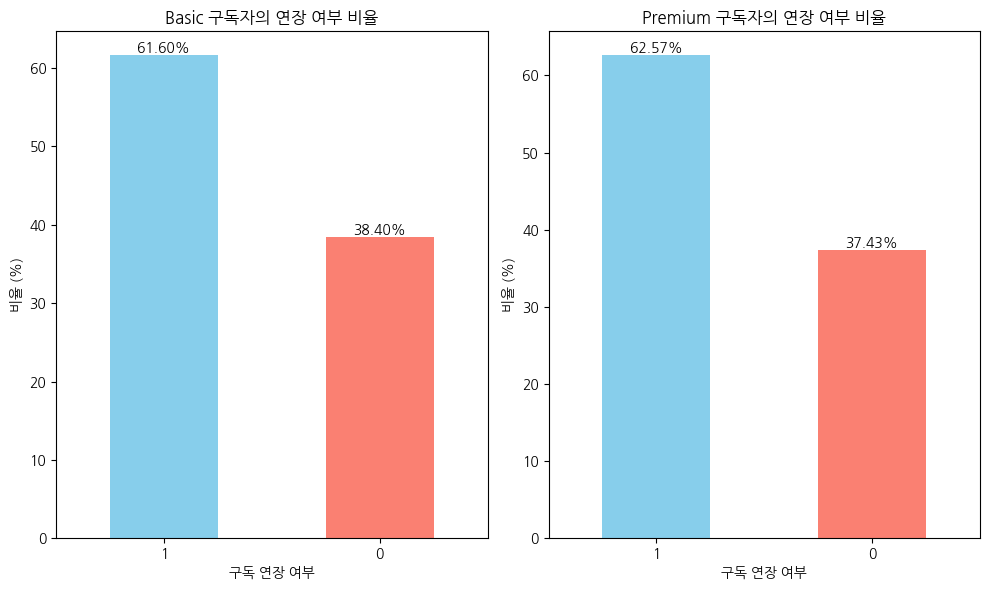

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
bars = basic_renewed.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Basic 구독자의 연장 여부 비율')
plt.xlabel('구독 연장 여부')
plt.ylabel('비율 (%)')
plt.xticks(rotation=0)
for index, value in enumerate(basic_renewed):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.subplot(1, 2, 2)
bars = premium_renewed.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Premium 구독자의 연장 여부 비율')
plt.xlabel('구독 연장 여부')
plt.ylabel('비율 (%)')
plt.xticks(rotation=0)
for index, value in enumerate(premium_renewed):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom', color='black')

plt.tight_layout()
plt.show()

1% 미만의 차이를 보이고 있다. 

그렇다면 베이직과 프리미엄에서 각각 어떤 학생들이 구독을 연장했는지 확인해보자

In [21]:
basic_users = df[df['구독 유형'] == 'Basic']
basic_users

,유저 아이디,구독 기간(월),최근 로그인 (일),평균 로그인 시간,학습 평균 시간(분),월간 학습 일수,수료한 코스,최근 학습 성취도,중단된 학습,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,지난 3개월 결제 패턴,구독 연장 여부
0,b919c29d,13,14,14.946163,8.427187,18,16,68.360455,3,4,0,Basic,4,5,0
1,a0a60abb,16,18,18.453224,72.646087,16,13,97.567322,2,3,1,Basic,1,6,1
3,5dc0ba8b,1,19,17.628656,42.659066,19,18,70.153228,0,3,0,Basic,1,0,1
4,65c83654,4,5,21.390656,30.744287,19,10,81.917908,2,4,1,Basic,3,0,1
5,b7586b82,4,4,17.274007,34.034189,21,8,74.371028,2,4,2,Basic,5,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,6ab018ed,12,25,12.730692,58.407028,2,8,64.614196,1,3,2,Basic,3,6,1
9994,9ee4e40c,11,6,11.187836,88.757610,6,9,77.335911,5,4,2,Basic,1,4,1
9996,24588752,10,11,19.374054,45.464833,9,8,82.750244,3,3,1,Basic,2,7,1
9997,e4622a54,7,27,18.240978,127.302411,24,14,81.567839,3,5,2,Basic,1,6,1


In [22]:
grouped_data = basic_users.groupby(['선호하는 난이도', '커뮤니티 참여도', '지난 3개월 결제 패턴'])['구독 연장 여부'].mean().reset_index()
grouped_data = grouped_data.sort_values(by='구독 연장 여부', ascending=False)

grouped_data

,선호하는 난이도,커뮤니티 참여도,지난 3개월 결제 패턴,구독 연장 여부
98,2,4,2,0.909091
57,1,4,1,0.800000
106,2,5,2,0.793103
76,2,1,4,0.785714
104,2,5,0,0.781250
...,...,...,...,...
97,2,4,1,0.472222
36,1,1,4,0.465116
108,2,5,4,0.454545
88,2,3,0,0.409091


Basic 구독자 중에선 
- 선호하는 나이도 : 상 / 커뮤니티 참여도 : 4 / 3개월 결제 패턴 : 가운데 달만 결제함
- 선호하는 난이도 : 중 / 커뮤니티 참여도 : 4 / 3개월 결제 패턴 : 마지막 달만 결제함
- 선호나는 난이도 : 상 / 커뮤니티 참여도 : 5 / 3개월 결제 패턴 : 가운데 달만 결제함

등 커뮤니티 참여도가 높은 그룹의 구독 연장 여부가 높게 측정 되었다.

상관 관계를 확인해보자

In [23]:
import scipy.stats as stats

correlation_matrix = basic_users[['커뮤니티 참여도', '선호하는 난이도', '지난 3개월 결제 패턴', '구독 연장 여부']].corr()
correlation_matrix

,커뮤니티 참여도,선호하는 난이도,지난 3개월 결제 패턴,구독 연장 여부
커뮤니티 참여도,1.000000,-0.245992,-0.008355,0.000162
선호하는 난이도,-0.245992,1.000000,0.013524,0.019251
지난 3개월 결제 패턴,-0.008355,0.013524,1.000000,0.000035
구독 연장 여부,0.000162,0.019251,0.000035,1.000000


In [24]:
correlation_coefficient = 0.000162
n = len(basic_users)
degrees_of_freedom = n - 2

t_score = correlation_coefficient * ((n - 2) ** 0.5) / ((1 - correlation_coefficient ** 2) ** 0.5)
p_value = stats.t.sf(abs(t_score), degrees_of_freedom) * 2 

print(f"t-score: {t_score}")
print(f"p-value: {p_value}")

t-score: 0.01252439188610146
p-value: 0.9900076603280367


상관 계수와 피어슨 상관 계수 검증 방법 모두 통계적으로 유의미 하다고 결론 내리긴 어려운 것 같다.
- 그렇다면 프리미엄 구독자들을 확인해보자

In [25]:
premium_users = df[df['구독 유형'] == 'Premium']
premium_users

,유저 아이디,구독 기간(월),최근 로그인 (일),평균 로그인 시간,학습 평균 시간(분),월간 학습 일수,수료한 코스,최근 학습 성취도,중단된 학습,커뮤니티 참여도,선호하는 난이도,구독 유형,고객 문의 이력,지난 3개월 결제 패턴,구독 연장 여부
2,b9f171ae,22,1,16.195228,21.774492,13,14,94.358763,3,4,1,Premium,0,7,1
7,8c948022,10,20,14.751713,67.821393,10,16,88.567777,3,5,0,Premium,1,1,1
11,b8696d56,5,28,18.474545,117.134599,9,9,97.786237,6,3,1,Premium,2,3,0
12,25c57932,7,22,15.392561,176.304779,16,10,69.100850,4,5,2,Premium,2,0,1
16,d35c46d7,8,19,12.355991,18.753933,19,13,87.810688,1,5,2,Premium,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,365dc677,22,20,16.104762,33.315978,11,17,55.935378,2,5,0,Premium,2,5,1
9992,5bb80449,19,4,13.105111,100.630340,1,12,82.762566,5,5,0,Premium,1,7,1
9993,1d959e91,7,29,16.165190,84.130016,14,14,78.348380,4,5,0,Premium,1,6,1
9995,ae6b76bc,22,29,14.727623,84.053558,18,16,64.966803,2,5,0,Premium,1,1,1


In [26]:
grouped_data2 = premium_users.groupby(['선호하는 난이도', '커뮤니티 참여도', '지난 3개월 결제 패턴'])['구독 연장 여부'].mean().reset_index()
grouped_data2 = grouped_data2.sort_values(by='구독 연장 여부', ascending=False)

grouped_data2

,선호하는 난이도,커뮤니티 참여도,지난 3개월 결제 패턴,구독 연장 여부
17,1,3,1,0.846154
46,2,3,6,0.782609
49,2,4,1,0.782609
22,1,3,6,0.750000
42,2,3,2,0.727273
...,...,...,...,...
4,0,4,4,0.500000
45,2,3,5,0.470588
41,2,3,1,0.444444
53,2,4,5,0.428571


In [27]:
correlation_matrix = premium_users[['커뮤니티 참여도', '선호하는 난이도', '지난 3개월 결제 패턴', '구독 연장 여부']].corr()
correlation_matrix

,커뮤니티 참여도,선호하는 난이도,지난 3개월 결제 패턴,구독 연장 여부
커뮤니티 참여도,1.000000,-0.272677,0.004924,0.023804
선호하는 난이도,-0.272677,1.000000,0.027019,0.003160
지난 3개월 결제 패턴,0.004924,0.027019,1.000000,-0.002858
구독 연장 여부,0.023804,0.003160,-0.002858,1.000000


In [28]:
correlation_coefficient = 0.023804
n = len(basic_users)
degrees_of_freedom = n - 2

t_score = correlation_coefficient * ((n - 2) ** 0.5) / ((1 - correlation_coefficient ** 2) ** 0.5)
p_value = stats.t.sf(abs(t_score), degrees_of_freedom) * 2 

print(f"t-score: {t_score}")
print(f"p-value: {p_value}")

t-score: 1.8408340826896314
p-value: 0.06569541190951712


- p-value: 0.06569541190951712 값으로 일반적인 유의 수준인 0.05에 근접하였지만 유의 수준을 초과 하였다.

## 결론
1. 학습 평균 시간(분)과 구독 연장 여부의 상관 관계 파악하기
    - 구독 연장 여부와 각 칼럼별 상관 관계를 확인했을시, 평균 학습 시간과 '상대적인' 상관 관계 발견
    - 데이터 분석 결과 일정 시간 이상 학습한 학생들의 구독 연장율은 100%
    - 그럼 일정 시간 이상 학습한 학생들의 구독 요인은 뭔지 파악하려 했으나, 각 요소별 유의미한 상관 관계 발견X
    

2. 구독 유형에 따른 구독 연장 여부는 관계가 있을까?
    - 두 가지 유형(Basic, Premium)간의 구독 유지 비율 차이는 1%미만.
    - 그렇다면 각 유형의 구독자들중 구독을 연장한 사람들의 행동을 그룹핑해서 분석
    - 두 유형 모두 어느정도 커뮤니티 참여도가 보였으나, 통계적인 수준은 아닌 걸로 나옴.

망했다. 다른 가설을 세우고 다시 해봐야 한다.